In [ ]:
import pandas as pd
import numpy as np
df= pd.read_csv("campeonato-brasileiro-full.csv")
df
 
# 2) Explorar os dados
print(df.head())
print(df.columns)
 
# 3) Limpeza dos dados - remover linhas sem mandante_Placar ou visitante_Placar
df_clean = df.dropna(subset=['mandante_Placar', 'visitante_Placar'])

In [3]:
df_clean

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/03/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/03/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/03/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/03/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/03/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8780,8783,38,08/12/2024,16:04,Cuiaba,Vasco,4-3-3,4-3-2-1,B. Franco,F. Loureiro,Vasco,Arena Pantanal,1,2,MT,RJ
8781,8784,38,08/12/2024,16:04,Palmeiras,Fluminense,4-2-3-1,4-2-3-1,A. Moreira Ferreira,L. Venker de Menezes,Fluminense,Allianz Parque,0,1,SP,RJ
8782,8776,38,08/12/2024,16:05,Fortaleza,Internacional,4-2-3-1,4-1-2-1-2,J. Vojvoda,R. Machado Marques,Fortaleza,Arena Castelão,3,0,CE,RS
8783,8780,38,08/12/2024,16:05,Bragantino,Criciuma,4-2-3-1,4-1-2-1-2,F. Seabra,C. Tencati,Bragantino,Nabizão,5,1,SP,SC


In [6]:
df_clean['total_gols'] = df_clean['mandante_Placar'] + df_clean['visitante_Placar']
media = np.mean(df_clean['total_gols'])
mediana = np.median(df_clean['total_gols'])
desvio = np.std(df_clean['total_gols'])
 
print(f'Média: {media:.2f}')
print(f'Mediana: {mediana:.2f}')
print(f'Desvio padrão: {desvio:.2f}')
 

Média: 2.56
Mediana: 2.00
Desvio padrão: 1.63


In [7]:
df_clean['total_gols'].describe()

count    8785.000000
mean        2.562891
std         1.633046
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        11.000000
Name: total_gols, dtype: float64

In [4]:
df_clean['formacao_mandante'].value_counts()

formacao_mandante
4-2-3-1      2182
4-3-3         422
4-1-4-1       375
4-4-2         228
3-4-2-1        65
4-3-1-2        64
3-4-1-2        64
4-2-2-2        60
4-3-2-1        50
3-4-3          50
4-4-1-1        50
4-1-2-1-2      46
3-5-2          33
4-1-3-2        29
5-4-1          29
4-5-1          21
5-3-2          17
3-1-4-2        10
4-2-4-0         8
3-2-4-1         4
3-5-1-1         2
3-3-3-1         1
Name: count, dtype: int64

In [5]:
df_clean['formacao_visitante'].value_counts()

formacao_visitante
4-2-3-1      2046
4-1-4-1       425
4-3-3         410
4-4-2         246
3-4-2-1        79
3-4-1-2        71
4-3-2-1        65
4-4-1-1        64
3-4-3          62
5-4-1          58
4-2-2-2        52
4-1-2-1-2      45
4-3-1-2        43
3-5-2          39
4-5-1          25
5-3-2          21
3-1-4-2        18
4-1-3-2        18
4-2-4-0        17
3-5-1-1         4
3-2-4-1         2
Name: count, dtype: int64

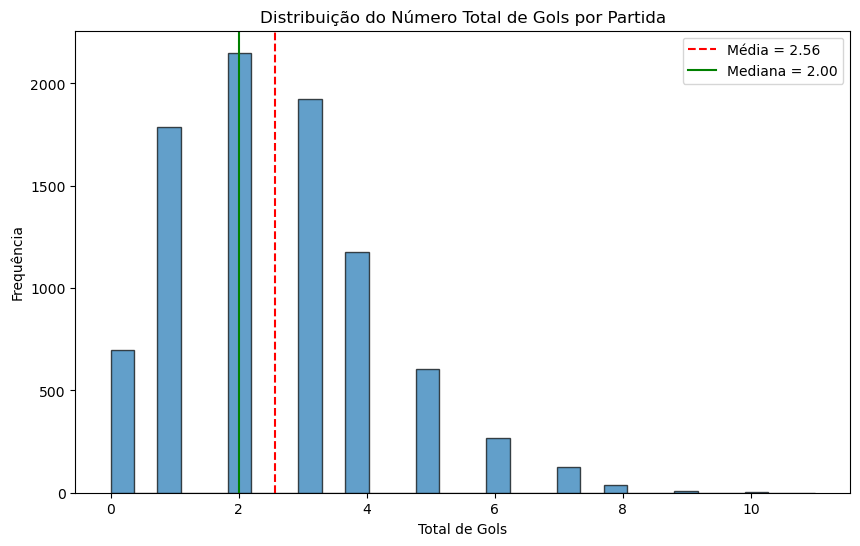

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(df_clean['total_gols'], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(media, color='red', linestyle='--', label=f'Média = {media:.2f}')
plt.axvline(mediana, color='green', linestyle='-', label=f'Mediana = {mediana:.2f}')
plt.title('Distribuição do Número Total de Gols por Partida')
plt.xlabel('Total de Gols')
plt.ylabel('Frequência')
plt.legend()
plt.show()

In [10]:
df_clean[df_clean['total_gols'] >= 10]

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,total_gols
23,24,2,06/04/2003,18:00,Vasco,Goias,NaN,NaN,NaN,NaN,Vasco,São Januário,6,4,RJ,GO,10
450,451,38,22/10/2003,21:40,Bahia,Santos,NaN,NaN,NaN,NaN,Santos,Fonte Nova,4,7,BA,SP,11
1876,1877,32,01/11/2006,19:30,Athletico-PR,Vasco,NaN,NaN,NaN,NaN,Athletico-PR,Kyocera Arena,6,4,PR,RJ,10
2333,2334,1,11/05/2008,18:10,Portuguesa,Figueirense,NaN,NaN,NaN,NaN,-,Canindé,5,5,SP,SC,10
8275,8276,26,07/10/2023,16:01,Goias,Bahia,3-4-3,4-4-2,A. Evangelista Macedo Freitas,R. Ceni,Bahia,Estádio Hailé Pinheiro - Serrinha,4,6,GO,BA,10


In [12]:
import numpy as np
 
# Converter a coluna 'total_gols' para um array NumPy
total_gols_array = df_clean['total_gols'].to_numpy()
 
# Calcular Q1, Q3 e IQR
Q1 = np.percentile(total_gols_array, 25)
Q3 = np.percentile(total_gols_array, 75)
IQR = Q3 - Q1
 
# Definir os limites para detecção de outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
 
outliers_indices = (total_gols_array < limite_inferior) | (total_gols_array > limite_superior)
outliers = df.loc[outliers_indices]
 
print(f"Q1 (25º percentil): {Q1}")
print(f"Q3 (75º percentil): {Q3}")
print(f"IQR (Intervalo Interquartil): {IQR}")
print(f"Limite Inferior para Outliers: {limite_inferior}")
print(f"Limite Superior para Outliers: {limite_superior}")
 
print("\nPartidas consideradas outliers (com número atípico de gols):")
display(outliers)

Q1 (25º percentil): 1.0
Q3 (75º percentil): 4.0
IQR (Intervalo Interquartil): 3.0
Limite Inferior para Outliers: -3.5
Limite Superior para Outliers: 8.5

Partidas consideradas outliers (com número atípico de gols):


,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
23,24,2,06/04/2003,18:00,Vasco,Goias,NaN,NaN,NaN,NaN,Vasco,São Januário,6,4,RJ,GO
450,451,38,22/10/2003,21:40,Bahia,Santos,NaN,NaN,NaN,NaN,Santos,Fonte Nova,4,7,BA,SP
616,618,6,16/05/2004,16:00,Criciuma,Goias,NaN,NaN,NaN,NaN,Criciuma,Heriberto Hulse,7,2,SC,GO
1258,1263,15,27/07/2005,21:45,Athletico-PR,Vasco,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,7,2,PR,RJ
1286,1292,18,06/08/2005,16:00,Athletico-PR,Cruzeiro,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,5,4,PR,MG
1876,1877,32,01/11/2006,19:30,Athletico-PR,Vasco,NaN,NaN,NaN,NaN,Athletico-PR,Kyocera Arena,6,4,PR,RJ
1946,1947,1,12/05/2007,18:10,Figueirense,Athletico-PR,NaN,NaN,NaN,NaN,Athletico-PR,Orlando Scarpelli,3,6,SC,PR
2333,2334,1,11/05/2008,18:10,Portuguesa,Figueirense,NaN,NaN,NaN,NaN,-,Canindé,5,5,SP,SC
3579,3562,12,27/07/2011,21:50,Santos,Flamengo,NaN,NaN,NaN,NaN,Flamengo,Vila Belmiro,4,5,SP,RJ
3808,3809,35,16/11/2011,20:30,Fluminense,Gremio,NaN,NaN,NaN,NaN,Fluminense,Engenhão,5,4,RJ,RS


In [17]:
df.columns

Index(['ID', 'rodata', 'data', 'hora', 'mandante', 'visitante',
       'formacao_mandante', 'formacao_visitante', 'tecnico_mandante',
       'tecnico_visitante', 'vencedor', 'arena', 'mandante_Placar',
       'visitante_Placar', 'mandante_Estado', 'visitante_Estado'],
      dtype='object')

In [13]:
df_clean['vencedor'].value_counts()

vencedor
-                  2322
Sao Paulo           382
Flamengo            374
Internacional       357
Palmeiras           351
Corinthians         341
Santos              340
Atletico-MG         338
Fluminense          334
Gremio              328
Athletico-PR        320
Cruzeiro            318
Botafogo-RJ         270
Vasco               222
Goias               209
Coritiba            189
Figueirense         142
Bahia               142
Vitoria             136
Sport               131
Fortaleza           127
Ponte Preta         114
Juventude            96
Parana               83
Atletico-GO          79
Ceara                72
Chapecoense          70
Avai                 66
Sao Caetano          65
Bragantino           65
Criciuma             59
America-MG           58
Nautico              54
Paysandu             41
Cuiaba               40
Guarani              36
Portuguesa           31
Santa Cruz           15
Barueri              12
Santo Andre          11
Brasiliense          10
Ipating

In [15]:
df_mandante = df_clean.where(df_clean['mandante_Placar'] > df_clean['visitante_Placar'], inplace=True)

In [20]:
import pandas as pd

def analisar_estatisticas(df: pd.DataFrame) -> dict[str, pd.Series]:
    """
    Retorna estatísticas completas de desempenho de times, formações,
    rodadas e estádios com base nos dados de partidas.

    Parâmetros
    ----------
    df : pd.DataFrame
        DataFrame contendo as colunas:
        [
            'rodata', 'mandante', 'visitante', 'mandante_Placar',
            'visitante_Placar', 'vencedor', 'formacao_mandante',
            'formacao_visitante', 'arena'
        ]

    Retorna
    -------
    dict[str, pd.Series]
        Dicionário com estatísticas agregadas.
    """

    # 🏠 Total de gols como mandante
    gols_mandante = df.groupby("mandante")["mandante_Placar"].sum().sort_values(ascending=False)

    # 🛫 Total de gols como visitante
    gols_visitante = df.groupby("visitante")["visitante_Placar"].sum().sort_values(ascending=False)

    # ✅ Vitórias em casa
    vitorias_casa = df.loc[df["vencedor"] == df["mandante"], "mandante"].value_counts()

    # 🌍 Vitórias fora
    vitorias_fora = df.loc[df["vencedor"] == df["visitante"], "visitante"].value_counts()

    # 🏆 Formação mais vitoriosa
    formacao_vitorias = pd.concat([
        df.loc[df["vencedor"] == df["mandante"], "formacao_mandante"],
        df.loc[df["vencedor"] == df["visitante"], "formacao_visitante"]
    ]).value_counts()

    # 💀 Formação com mais derrotas
    formacao_derrotas = pd.concat([
        df.loc[df["vencedor"] == df["visitante"], "formacao_mandante"],  # derrotado mandante
        df.loc[df["vencedor"] == df["mandante"], "formacao_visitante"]   # derrotado visitante
    ]).value_counts()

    # ⚽ Total de gols por rodada
    gols_por_rodada = (
        df.assign(total_gols=df["mandante_Placar"] + df["visitante_Placar"])
        .groupby("rodata")["total_gols"]
        .sum()
        .sort_values(ascending=False)
    )

    # 🏟️ Total de gols por estádio
    gols_por_estadio = (
        df.assign(total_gols=df["mandante_Placar"] + df["visitante_Placar"])
        .groupby("arena")["total_gols"]
        .sum()
        .sort_values(ascending=False)
    )

    # 🔝 Rodadas com mais/menos gols
    rodada_mais_gols = gols_por_rodada[gols_por_rodada == gols_por_rodada.max()]
    rodada_menos_gols = gols_por_rodada[gols_por_rodada == gols_por_rodada.min()]

    # 🏟️ Estádios com mais/menos gols
    estadio_mais_gols = gols_por_estadio[gols_por_estadio == gols_por_estadio.max()]
    estadio_menos_gols = gols_por_estadio[gols_por_estadio == gols_por_estadio.min()]

    return {
        "gols_mandante": gols_mandante,
        "gols_visitante": gols_visitante,
        "vitorias_casa": vitorias_casa,
        "vitorias_fora": vitorias_fora,
        "formacao_vitorias": formacao_vitorias,
        "formacao_derrotas": formacao_derrotas,
        "gols_por_rodada": gols_por_rodada,
        "gols_por_estadio": gols_por_estadio,
        "rodada_mais_gols": rodada_mais_gols,
        "rodada_menos_gols": rodada_menos_gols,
        "estadio_mais_gols": estadio_mais_gols,
        "estadio_menos_gols": estadio_menos_gols
    }


In [21]:
estatisticas = analisar_estatisticas(df)

for nome, serie in estatisticas.items():
    print(f"\n===== {nome.upper()} =====")
    print(serie)



===== GOLS_MANDANTE =====
mandante
Santos             728
Sao Paulo          716
Flamengo           710
Atletico-MG        704
Palmeiras          675
Athletico-PR       669
Gremio             666
Internacional      665
Fluminense         647
Cruzeiro           633
Corinthians        623
Botafogo-RJ        563
Vasco              490
Goias              478
Coritiba           404
Vitoria            335
Figueirense        311
Bahia              309
Sport              291
Fortaleza          264
Ponte Preta        256
Juventude          221
Parana             186
Atletico-GO        174
Avai               171
Ceara              160
Chapecoense        149
Bragantino         146
Criciuma           144
America-MG         133
Paysandu           132
Nautico            131
Sao Caetano        120
Portuguesa          90
Guarani             83
Cuiaba              74
Santa Cruz          50
Barueri             35
Santo Andre         29
Ipatinga            28
Gremio Prudente     25
Brasiliense         2

In [22]:
df

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/03/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/03/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/03/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/03/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/03/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8780,8783,38,08/12/2024,16:04,Cuiaba,Vasco,4-3-3,4-3-2-1,B. Franco,F. Loureiro,Vasco,Arena Pantanal,1,2,MT,RJ
8781,8784,38,08/12/2024,16:04,Palmeiras,Fluminense,4-2-3-1,4-2-3-1,A. Moreira Ferreira,L. Venker de Menezes,Fluminense,Allianz Parque,0,1,SP,RJ
8782,8776,38,08/12/2024,16:05,Fortaleza,Internacional,4-2-3-1,4-1-2-1-2,J. Vojvoda,R. Machado Marques,Fortaleza,Arena Castelão,3,0,CE,RS
8783,8780,38,08/12/2024,16:05,Bragantino,Criciuma,4-2-3-1,4-1-2-1-2,F. Seabra,C. Tencati,Bragantino,Nabizão,5,1,SP,SC


In [23]:
import pandas as pd

def calcular_aproveitamento(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calcula o aproveitamento (geral, em casa e fora) de cada time.

    Parâmetros
    ----------
    df : pd.DataFrame
        DataFrame com colunas:
        ['mandante', 'visitante', 'mandante_Placar', 'visitante_Placar', 'vencedor']

    Retorna
    -------
    pd.DataFrame
        DataFrame com colunas:
        ['time', 'pontos', 'jogos', 'aproveitamento_%', 'pontos_casa', 'jogos_casa',
         'aproveitamento_casa_%', 'pontos_fora', 'jogos_fora', 'aproveitamento_fora_%']
    """

    # -----------------------------------------------
    # 1️⃣ Cria colunas auxiliares de pontos
    # -----------------------------------------------
    df = df.copy()
    df["pontos_mandante"] = df.apply(
        lambda x: 3 if x["mandante_Placar"] > x["visitante_Placar"]
        else (1 if x["mandante_Placar"] == x["visitante_Placar"] else 0),
        axis=1
    )

    df["pontos_visitante"] = df.apply(
        lambda x: 3 if x["visitante_Placar"] > x["mandante_Placar"]
        else (1 if x["visitante_Placar"] == x["mandante_Placar"] else 0),
        axis=1
    )

    # -----------------------------------------------
    # 2️⃣ Soma de pontos por mandante e visitante
    # -----------------------------------------------
    pontos_casa = (
        df.groupby("mandante")["pontos_mandante"]
        .agg(["sum", "count"])
        .rename(columns={"sum": "pontos_casa", "count": "jogos_casa"})
    )

    pontos_fora = (
        df.groupby("visitante")["pontos_visitante"]
        .agg(["sum", "count"])
        .rename(columns={"sum": "pontos_fora", "count": "jogos_fora"})
    )

    # -----------------------------------------------
    # 3️⃣ Junta resultados e calcula o total
    # -----------------------------------------------
    resultado = (
        pontos_casa.merge(pontos_fora, left_index=True, right_index=True, how="outer")
        .fillna(0)
    )

    resultado["pontos"] = resultado["pontos_casa"] + resultado["pontos_fora"]
    resultado["jogos"] = resultado["jogos_casa"] + resultado["jogos_fora"]

    # -----------------------------------------------
    # 4️⃣ Calcula aproveitamentos (%)
    # -----------------------------------------------
    resultado["aproveitamento_%"] = (resultado["pontos"] / (resultado["jogos"] * 3) * 100).round(2)
    resultado["aproveitamento_casa_%"] = (resultado["pontos_casa"] / (resultado["jogos_casa"] * 3) * 100).round(2)
    resultado["aproveitamento_fora_%"] = (resultado["pontos_fora"] / (resultado["jogos_fora"] * 3) * 100).round(2)

    # -----------------------------------------------
    # 5️⃣ Ajustes finais
    # -----------------------------------------------
    resultado.index.name = "time"
    resultado = resultado.reset_index().sort_values("aproveitamento_%", ascending=False)

    return resultado


In [25]:
aproveitamento = calcular_aproveitamento(df)
aproveitamento


,time,pontos_casa,jogos_casa,pontos_fora,jogos_fora,pontos,jogos,aproveitamento_%,aproveitamento_casa_%,aproveitamento_fora_%
32,Palmeiras,753,386,497,386,1250,772,53.97,65.03,42.92
41,Sao Paulo,852,428,531,428,1383,856,53.86,66.36,41.36
20,Flamengo,815,428,538,428,1353,856,52.69,63.47,41.90
27,Internacional,818,409,466,409,1284,818,52.32,66.67,37.98
14,Corinthians,780,409,483,409,1263,818,51.47,63.57,39.36
17,Cruzeiro,686,371,443,371,1129,742,50.72,61.64,39.80
24,Gremio,768,388,410,388,1178,776,50.60,65.98,35.22
39,Santos,796,409,441,409,1237,818,50.41,64.87,35.94
4,Atletico-MG,765,409,462,408,1227,817,50.06,62.35,37.75
21,Fluminense,755,428,470,428,1225,856,47.70,58.80,36.60


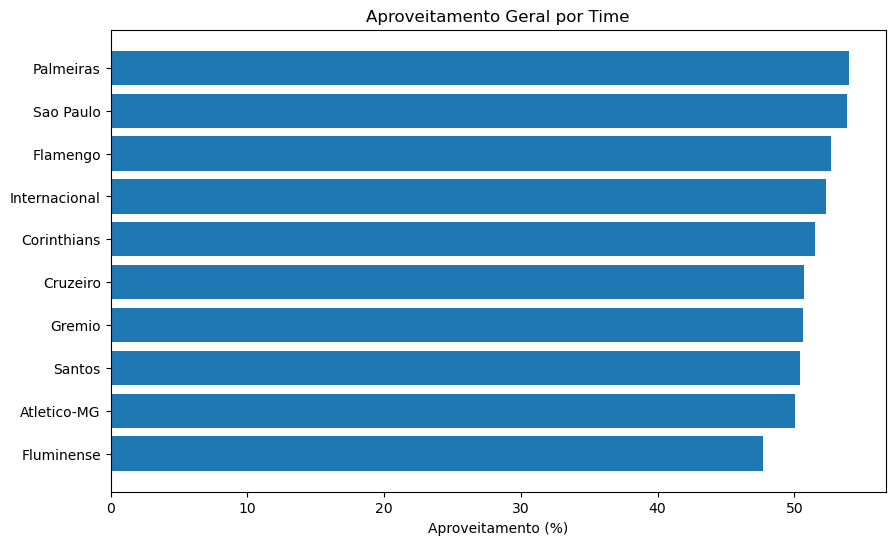

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(aproveitamento["time"].head(10), aproveitamento["aproveitamento_%"].head(10))
plt.xlabel("Aproveitamento (%)")
plt.title("Aproveitamento Geral por Time")
plt.gca().invert_yaxis()
plt.show()


In [26]:
df

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/03/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/03/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/03/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/03/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/03/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8780,8783,38,08/12/2024,16:04,Cuiaba,Vasco,4-3-3,4-3-2-1,B. Franco,F. Loureiro,Vasco,Arena Pantanal,1,2,MT,RJ
8781,8784,38,08/12/2024,16:04,Palmeiras,Fluminense,4-2-3-1,4-2-3-1,A. Moreira Ferreira,L. Venker de Menezes,Fluminense,Allianz Parque,0,1,SP,RJ
8782,8776,38,08/12/2024,16:05,Fortaleza,Internacional,4-2-3-1,4-1-2-1-2,J. Vojvoda,R. Machado Marques,Fortaleza,Arena Castelão,3,0,CE,RS
8783,8780,38,08/12/2024,16:05,Bragantino,Criciuma,4-2-3-1,4-1-2-1-2,F. Seabra,C. Tencati,Bragantino,Nabizão,5,1,SP,SC


In [43]:
import pandas as pd

def campeoes_por_ano(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calcula os campeões por ano com base no total de pontos conquistados,
    corrigindo empates ('-') e anos de temporada (jogos em jan-fev-mar
    pertencem ao ano anterior).

    Parâmetros
    ----------
    df : pd.DataFrame
        DataFrame com colunas:
        ['data', 'mandante', 'visitante', 'mandante_Placar', 'visitante_Placar', 'vencedor']

    Retorna
    -------
    pd.DataFrame
        ['ano', 'campeao', 'pontos', 'jogos', 'aproveitamento_%']
    """

    # -----------------------------------------------
    # 1️⃣ Cópia e limpeza inicial
    # -----------------------------------------------
    df = df.copy()

    # Garante que data é datetime
    df["data"] = pd.to_datetime(df["data"], errors="coerce", dayfirst=True)

    # Corrige empates: "-" → None
    df["vencedor"] = df["vencedor"].replace("-", None)

    # Converte placares para numéricos
    df["mandante_Placar"] = pd.to_numeric(df["mandante_Placar"], errors="coerce")
    df["visitante_Placar"] = pd.to_numeric(df["visitante_Placar"], errors="coerce")

    # Remove linhas sem data ou placar
    df = df.dropna(subset=["data", "mandante_Placar", "visitante_Placar"])

    # -----------------------------------------------
    # 2️⃣ Corrige o ano da temporada
    # -----------------------------------------------
    df["ano"] = df["data"].dt.year
    df.loc[df["data"].dt.month.isin([1, 2, 3]), "ano"] -= 1

    # -----------------------------------------------
    # 3️⃣ Cálculo dos pontos por partida
    # -----------------------------------------------
    def pontos_mandante(row) -> int:
        if row["vencedor"] == row["mandante"]:
            return 3
        elif row["vencedor"] == row["visitante"]:
            return 0
        else:  # empate
            return 1

    def pontos_visitante(row) -> int:
        if row["vencedor"] == row["visitante"]:
            return 3
        elif row["vencedor"] == row["mandante"]:
            return 0
        else:  # empate
            return 1

    df["pontos_mandante"] = df.apply(pontos_mandante, axis=1)
    df["pontos_visitante"] = df.apply(pontos_visitante, axis=1)

    # -----------------------------------------------
    # 4️⃣ Soma dos pontos por time e ano
    # -----------------------------------------------
    pontos_mandante = (
        df.groupby(["ano", "mandante"])["pontos_mandante"]
        .agg(["sum", "count"])
        .rename(columns={"sum": "pontos_casa", "count": "jogos_casa"})
    )

    pontos_visitante = (
        df.groupby(["ano", "visitante"])["pontos_visitante"]
        .agg(["sum", "count"])
        .rename(columns={"sum": "pontos_fora", "count": "jogos_fora"})
    )

    resultado = (
        pontos_mandante.merge(pontos_visitante, left_index=True, right_index=True, how="outer")
        .fillna(0)
        .reset_index()
    )

    # Une nomes de times corretamente
    resultado["time"] = resultado["mandante"].combine_first(resultado["visitante"])
    resultado = resultado.drop(columns=["mandante", "visitante"])

    # Soma total
    resultado["pontos"] = resultado["pontos_casa"] + resultado["pontos_fora"]
    resultado["jogos"] = resultado["jogos_casa"] + resultado["jogos_fora"]
    resultado["aproveitamento_%"] = (resultado["pontos"] / (resultado["jogos"] * 3) * 100).round(2)

    # -----------------------------------------------
    # 5️⃣ Identifica o campeão de cada ano
    # -----------------------------------------------
    campeoes = (
        resultado.sort_values(["ano", "pontos", "aproveitamento_%"], ascending=[True, False, False])
        .groupby("ano")
        .first()
        .reset_index()[["ano", "time", "pontos", "jogos", "aproveitamento_%"]]
        .rename(columns={"time": "campeao"})
    )

    return campeoes


In [51]:
campeoes_corrigido = campeoes_por_ano(df)
campeoes_corrigido


,ano,campeao,pontos,jogos,aproveitamento_%
0,2002,Athletico-PR,6,2,100.00
1,2003,Cruzeiro,99,45,73.33
2,2004,Santos,94,46,68.12
3,2005,Palmeiras,85,42,67.46
4,2006,Santos,80,38,70.18
5,2007,Sao Paulo,77,38,67.54
6,2008,Cruzeiro,76,38,66.67
7,2009,Gremio,79,38,69.30
8,2010,Corinthians,78,38,68.42
9,2011,Coritiba,73,38,64.04


In [54]:
df["data"] = pd.to_datetime(df["data"], errors="coerce", dayfirst=True)
df["ano_campeonato"] = df["data"].dt.year

In [56]:
df[df['ano_campeonato'] == 2016]

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,ano_campeonato
5366,5368,1,2016-05-14,16:01,Flamengo,Sport,4-3-3,4-2-3-1,M. Ramalho,O. de Oliveira Filho,Flamengo,Estádio Municipal General Raulino de Oliveira,1,0,RJ,PE,2016
5367,5367,1,2016-05-14,16:03,Palmeiras,Athletico-PR,4-2-3-1,4-2-3-1,A. Stival,P. Autuori de Mello,Palmeiras,Allianz Parque,4,0,SP,PR,2016
5368,5369,1,2016-05-14,18:29,Atletico-MG,Santos,4-2-3-1,4-2-3-1,D. Aguirre Camblor,D. Silvestre Júnior,Atletico-MG,Estádio Raimundo Sampaio,1,0,MG,SP,2016
5369,5370,1,2016-05-14,21:01,Coritiba,Cruzeiro,4-2-3-1,4-2-3-1,G. Kleina,G. Delamore,Coritiba,Couto Pereira,1,0,PR,MG,2016
5370,5371,1,2016-05-15,11:00,Santa Cruz,Vitoria,4-2-3-1,4-2-3-1,E. Da Conceição Silva,V. Carmo Mancini,Santa Cruz,Estádio do Arruda,4,1,PE,BA,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5740,5743,38,2016-12-11,17:05,Athletico-PR,Flamengo,4-2-3-1,4-2-3-1,P. Autuori de Mello,J. Mannarino,-,Estádio Joaquim Américo Guimarães,0,0,PR,RJ,2016
5741,5744,38,2016-12-11,17:05,Vitoria,Palmeiras,4-2-3-1,4-3-3,A. Fucks,A. Stival,Palmeiras,Barradão,1,2,BA,SP,2016
5742,5745,38,2016-12-11,17:05,Ponte Preta,Coritiba,4-1-4-1,4-4-2,F. Moreira,P. Carpegiani,Ponte Preta,Moisés Lucarelli,2,0,SP,PR,2016
5743,5737,38,2016-12-11,17:06,Santos,America-MG,4-2-3-1,4-1-4-1,D. Silvestre Júnior,E. Alves Moreira,Santos,Estádio Urbano Caldeira,1,0,SP,MG,2016


In [63]:
import pandas as pd

def tabela_campeonato(df: pd.DataFrame, ano: int) -> pd.DataFrame:
    """
    Gera a tabela de classificação do campeonato de um ano específico,
    incluindo jogos, vitórias, empates, derrotas, gols pró, sofridos,
    saldo de gols e pontos.

    Parâmetros
    ----------
    df : pd.DataFrame
        DataFrame com colunas:
        ['ano_campeonato', 'mandante', 'visitante',
         'mandante_Placar', 'visitante_Placar', 'vencedor']
    ano : int
        Ano do campeonato desejado.

    Retorna
    -------
    pd.DataFrame
        Tabela completa de classificação do campeonato.
    """

    # -----------------------------------------------
    # 1️⃣ Filtra o ano
    # -----------------------------------------------
    df_ano = df[df["ano_campeonato"] == ano].copy()

    # Normaliza tipos e empates
    df_ano["vencedor"] = df_ano["vencedor"].replace("-", None)
    df_ano["mandante_Placar"] = pd.to_numeric(df_ano["mandante_Placar"], errors="coerce")
    df_ano["visitante_Placar"] = pd.to_numeric(df_ano["visitante_Placar"], errors="coerce")

    # -----------------------------------------------
    # 2️⃣ Inicializa dicionários de contagem
    # -----------------------------------------------
    stats = {}

    # Função auxiliar para atualizar estatísticas
    def atualizar_time(time, vitorias=0, empates=0, derrotas=0, gp=0, gs=0):
        if time not in stats:
            stats[time] = {"jogos": 0, "vitorias": 0, "empates": 0,
                           "derrotas": 0, "gp": 0, "gs": 0}
        stats[time]["jogos"] += 1
        stats[time]["vitorias"] += vitorias
        stats[time]["empates"] += empates
        stats[time]["derrotas"] += derrotas
        stats[time]["gp"] += gp
        stats[time]["gs"] += gs

    # -----------------------------------------------
    # 3️⃣ Percorre cada jogo e atualiza estatísticas
    # -----------------------------------------------
    for _, row in df_ano.iterrows():
        mandante = row["mandante"]
        visitante = row["visitante"]
        gm = row["mandante_Placar"]
        gv = row["visitante_Placar"]

        if pd.isna(gm) or pd.isna(gv):
            continue

        if row["vencedor"] == mandante:
            atualizar_time(mandante, vitorias=1, gp=gm, gs=gv)
            atualizar_time(visitante, derrotas=1, gp=gv, gs=gm)
        elif row["vencedor"] == visitante:
            atualizar_time(visitante, vitorias=1, gp=gv, gs=gm)
            atualizar_time(mandante, derrotas=1, gp=gm, gs=gv)
        else:  # empate
            atualizar_time(mandante, empates=1, gp=gm, gs=gv)
            atualizar_time(visitante, empates=1, gp=gv, gs=gm)

    # -----------------------------------------------
    # 4️⃣ Cria DataFrame final
    # -----------------------------------------------
    tabela = pd.DataFrame(stats).T
    tabela["saldo_gols"] = tabela["gp"] - tabela["gs"]
    tabela["pontos"] = (tabela["vitorias"] * 3) + (tabela["empates"] * 1)
    tabela["aproveitamento_%"] = (tabela["pontos"] / (tabela["jogos"] * 3) * 100).round(2)

    tabela = tabela[[
        "jogos", "vitorias", "empates", "derrotas",
        "gp", "gs", "saldo_gols", "pontos", "aproveitamento_%"
    ]].sort_values(
        by=["pontos", "saldo_gols", "gp"], ascending=[False, False, False]
    )

    tabela.index.name = "time"
    tabela.reset_index(inplace=True)

    return tabela


In [68]:
tabela_2016 = tabela_campeonato(df, 2023)
tabela_2016


,time,jogos,vitorias,empates,derrotas,gp,gs,saldo_gols,pontos,aproveitamento_%
0,Palmeiras,38,20,10,8,64,33,31,70,61.40
1,Gremio,38,21,5,12,63,56,7,68,59.65
2,Atletico-MG,38,19,9,10,52,32,20,66,57.89
3,Flamengo,38,19,9,10,56,42,14,66,57.89
4,Botafogo-RJ,38,18,10,10,58,37,21,64,56.14
5,Bragantino,38,17,11,10,49,35,14,62,54.39
6,Athletico-PR,38,14,14,10,51,43,8,56,49.12
7,Fluminense,38,16,8,14,51,47,4,56,49.12
8,Internacional,38,15,10,13,46,45,1,55,48.25
9,Fortaleza,38,15,9,14,45,44,1,54,47.37
